In [3]:
import pandas as pd
from matplotlib.pyplot import tight_layout
from sklearn.model_selection import train_test_split
import joblib


data = pd.read_csv('../data/processed/dataset_reduced.csv')

data = data.drop(columns=['Z', 'Period'])
data_encoded = pd.get_dummies(data, columns=['Cation', 'Anion'])

# 划分训练集和测试集
data_encoded['target_class'] = pd.qcut(data_encoded['Cs'], q=10, labels=False)
X = data_encoded.drop(['Cs', 'target_class'], axis=1)
y = data_encoded['Cs']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)
# 加载最佳模型
best_model = joblib.load("../models/best_xgb_r.pkl")

# 重新预测
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [4]:
from matplotlib import pyplot as plt
import shap
X_train = X_train.astype({col: 'float64' for col in X_train.select_dtypes(include=['bool']).columns})

# 训练 SHAP 解释器
explainer = shap.Explainer(best_model, X_train)

# 计算 SHAP 值
shap_values_train = explainer(X_train)
shap_values_test = explainer(X_test)

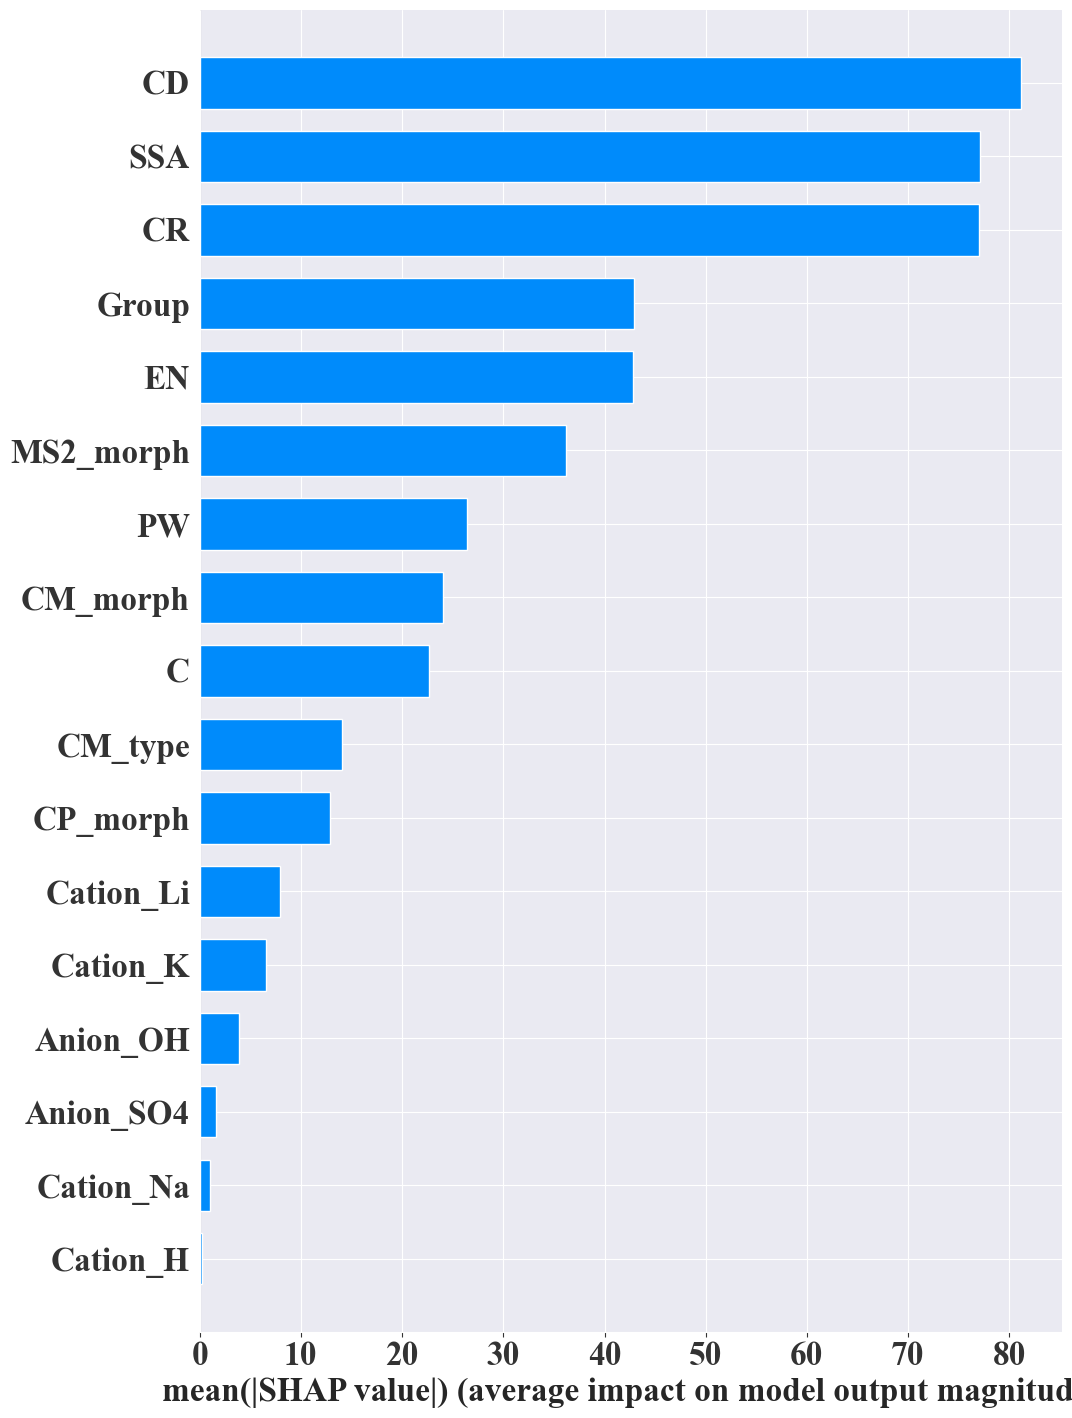

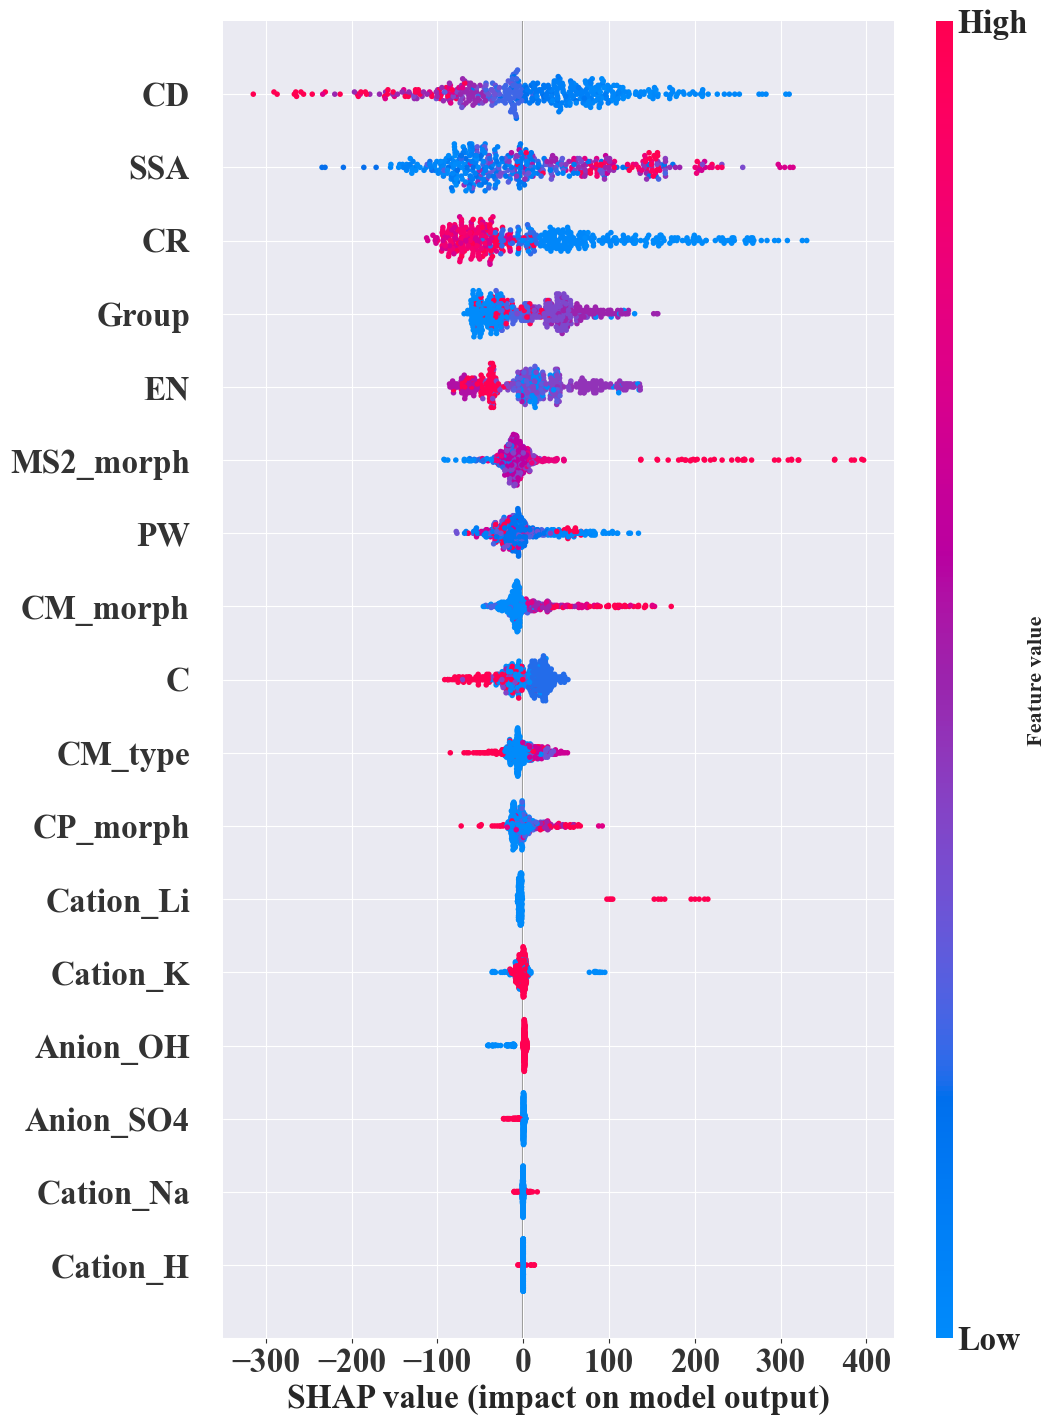

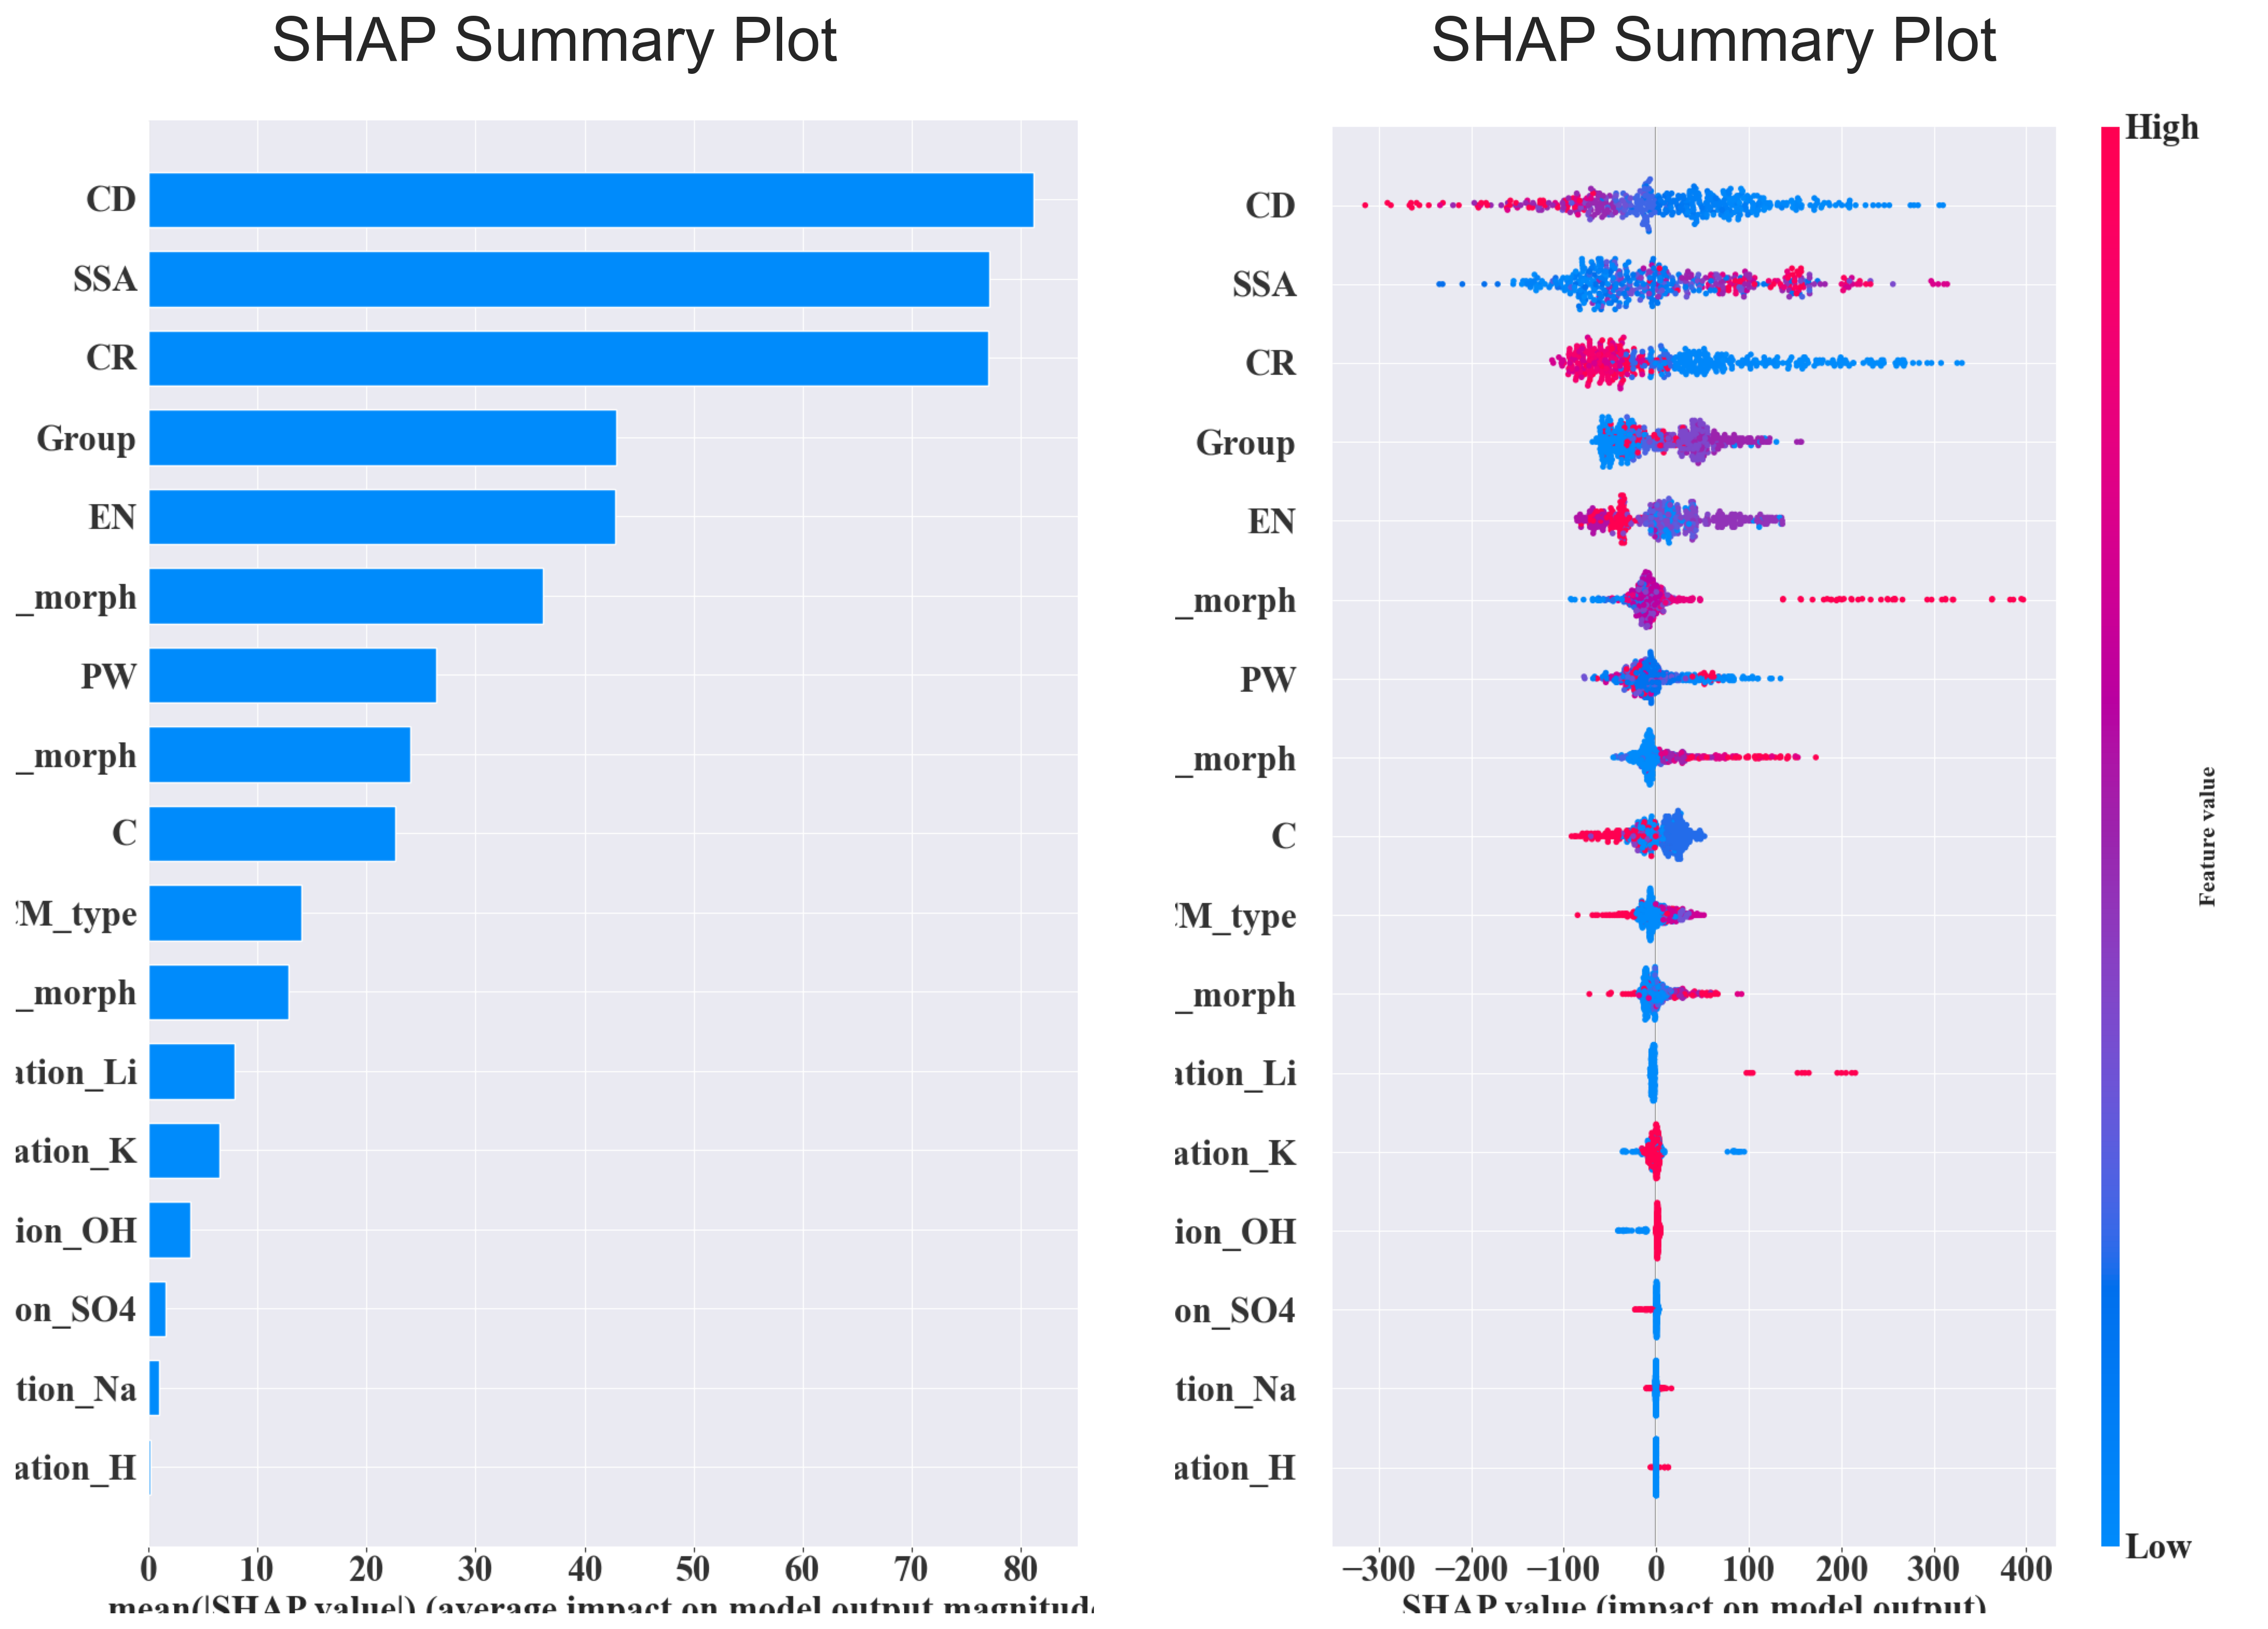

✅ SHAP 画布优化完成，已保存至 ../results/figures/shap_summary_plot.png


In [29]:
# **设定 SHAP 图的 `plot_size=(8,12)`，避免后续缩放问题**
plt.figure()
shap.summary_plot(shap_values_train, plot_type='bar', show=False, plot_size=(10, 14))
fig1 = plt.gcf()

# 放大字体大小并更改字体为Times New Roman且加粗
for ax in fig1.axes:
    ax.title.set_fontsize(24)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

    ax.xaxis.label.set_size(24)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

    ax.yaxis.label.set_size(16)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

plt.figure()
shap.summary_plot(shap_values_train, show=False, bbox_inches='tight', plot_size=(10, 14))
fig2 = plt.gcf()

# 放大字体大小并更改字体为Times New Roman且加粗
for ax in fig2.axes:
    ax.title.set_fontsize(24)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

    ax.xaxis.label.set_size(24)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

    ax.yaxis.label.set_size(16)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

# **创建严格 16x12 画布**
final_fig, axes = plt.subplots(1, 2, figsize=(16, 12), dpi=300)

# **复制 SHAP 图像到 `subplot`**
for i, src_fig in enumerate([fig1, fig2]):
    src_fig.canvas.draw()
    axes[i].imshow(src_fig.canvas.buffer_rgba())  # 复制 SHAP 图
    axes[i].axis("off")

axes[0].set_title("SHAP Summary Plot", fontsize=28, pad=20)
axes[1].set_title("SHAP Summary Plot", fontsize=28, pad=20)

# # **优化间距，防止空白太大**
final_fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.05)

# **严格确保 `figsize=(16,12)` 生效**
final_fig.set_size_inches(16, 12, forward=True)

# **保存最终 SHAP 图**
output_path = "../results/figures/shap_summary_plot.png"
final_fig.savefig(output_path, dpi=300)

# **显示优化后的 SHAP 图**
plt.show()

print(f"✅ SHAP 画布优化完成，已保存至 {output_path}")

<Axes: xlabel='mean(|SHAP value|)'>

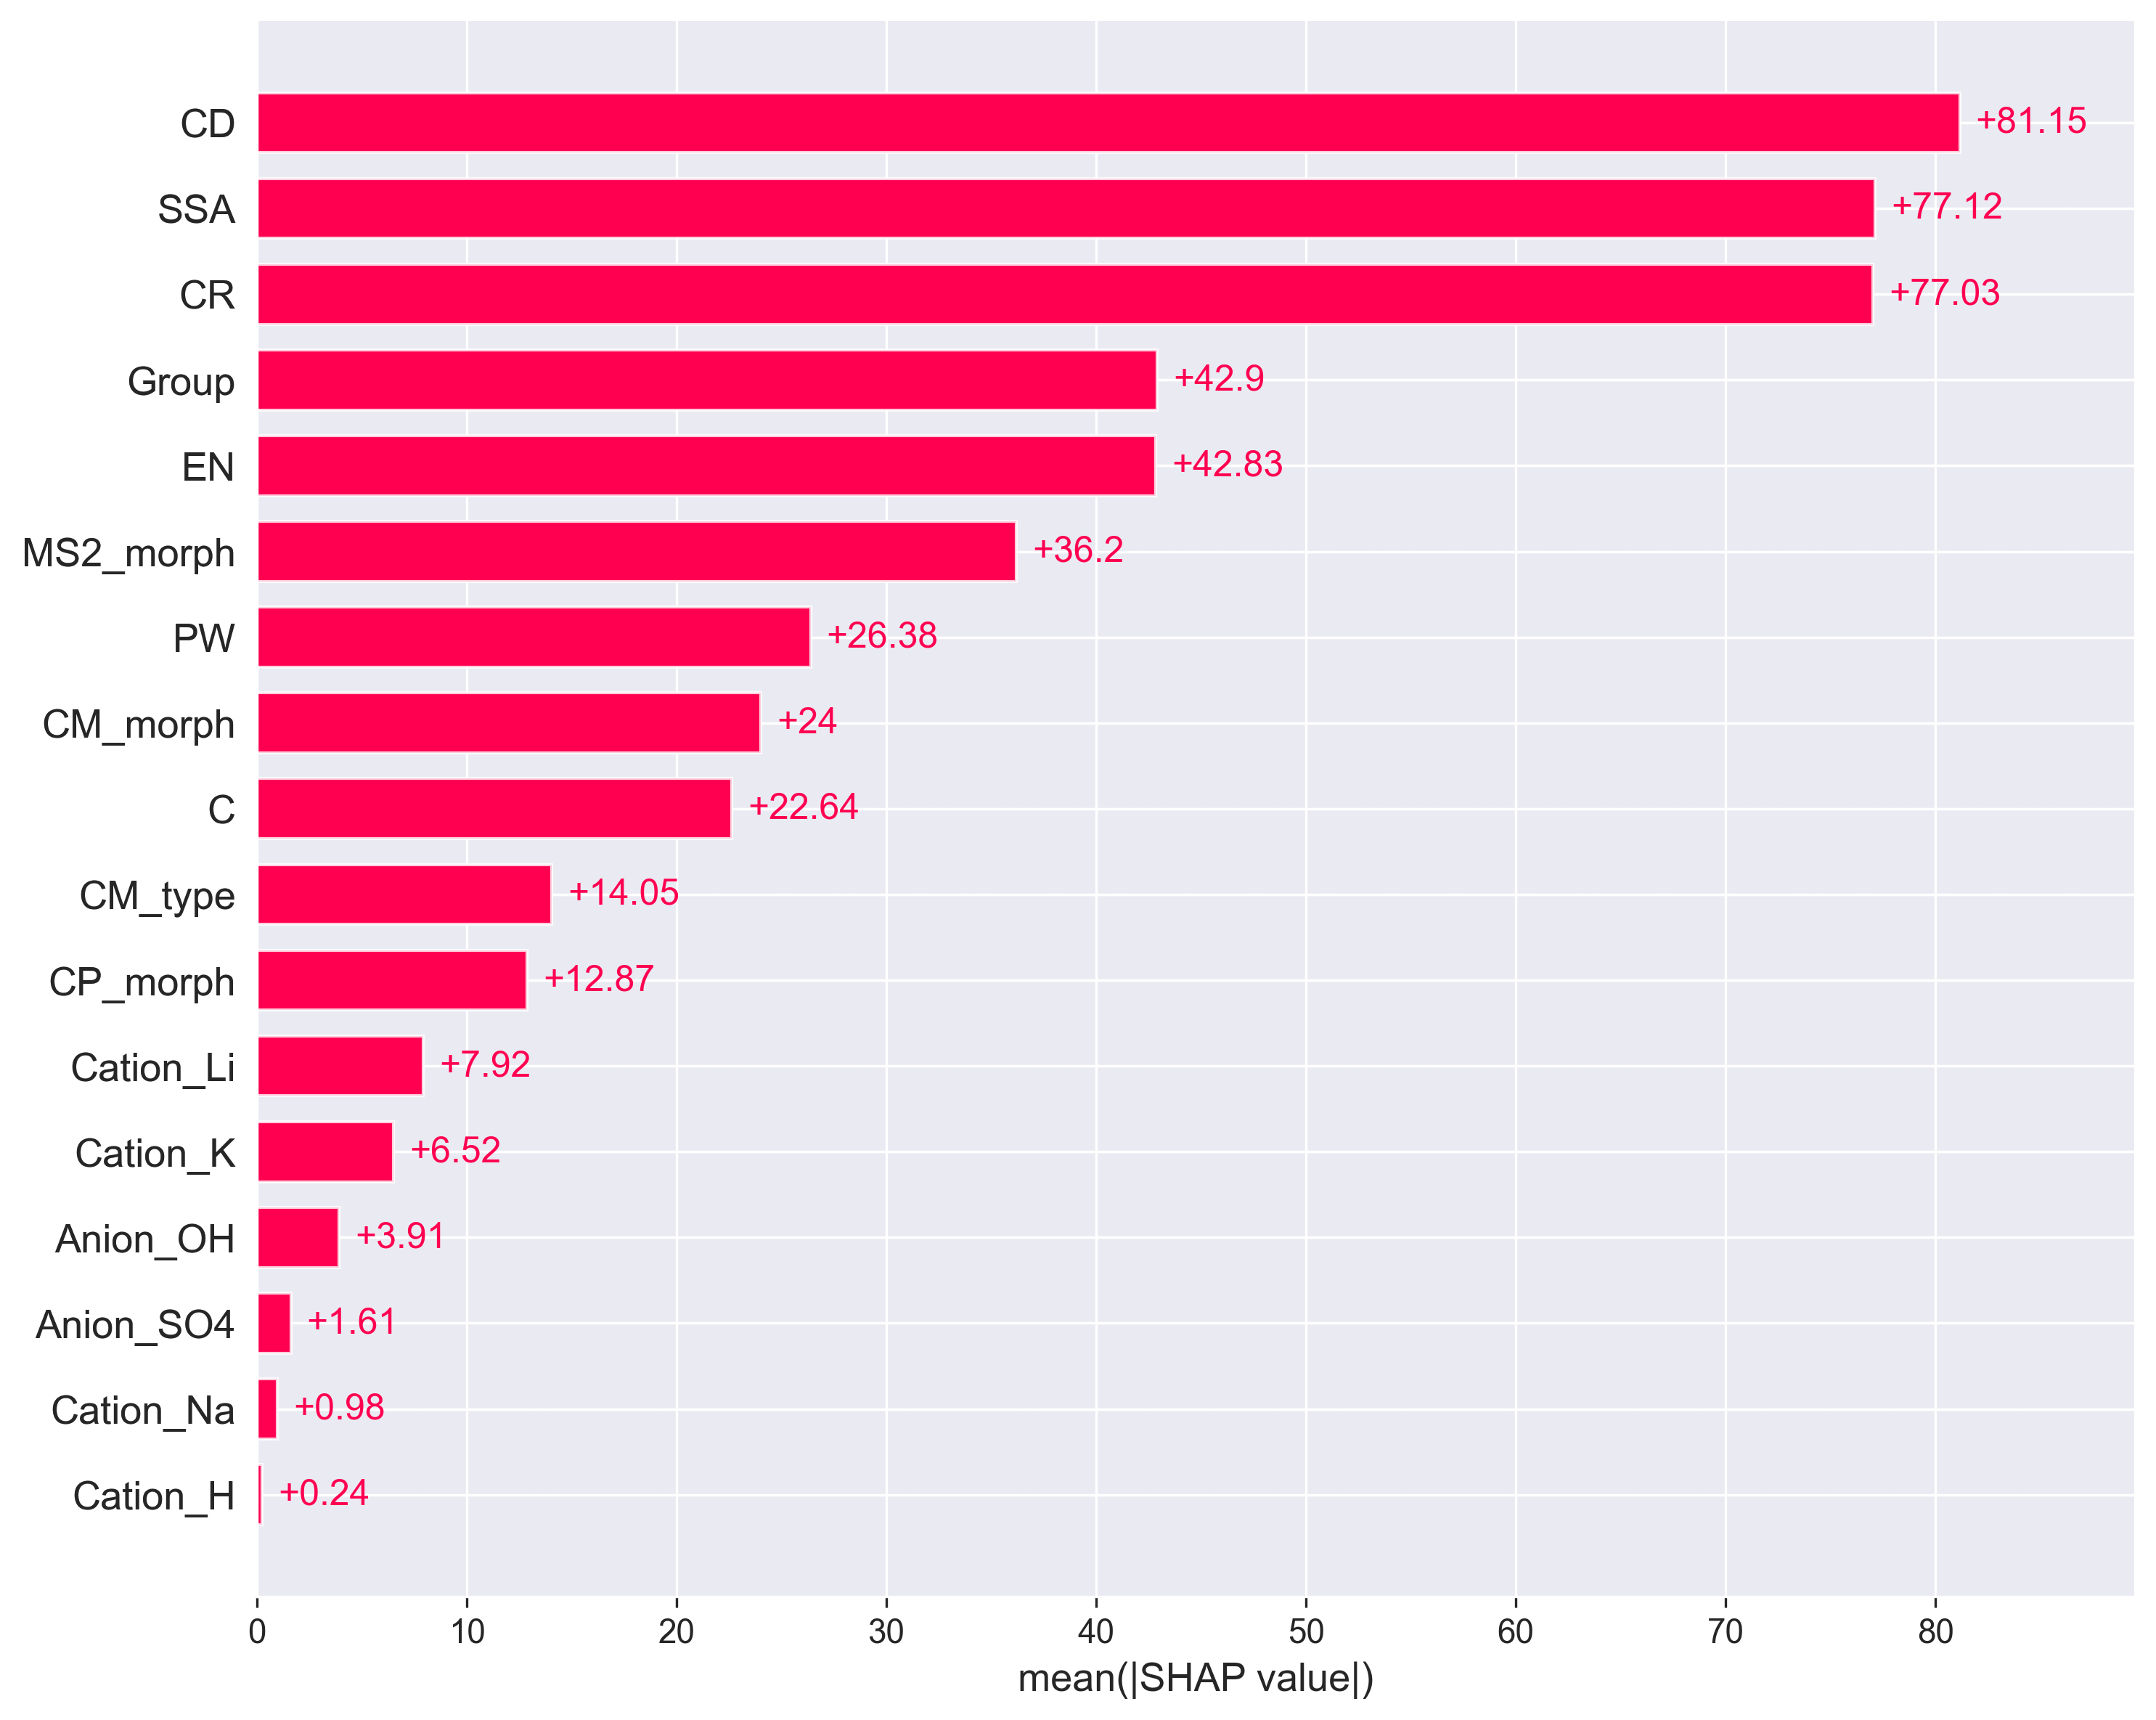

In [34]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10, 8), dpi=300)

shap.plots.bar(shap_values_train, show=False, max_display=20, ax=ax)

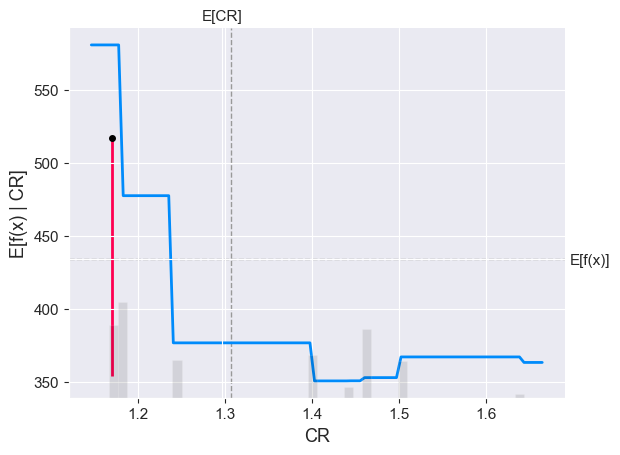

In [8]:
# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "CR",
    best_model.predict,
    X_train,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

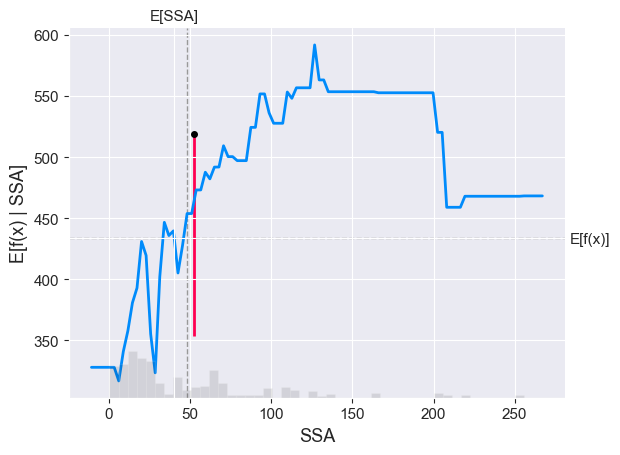

In [9]:
# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "SSA",
    best_model.predict,
    X_train,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)